## Creating Training Pipeline

### Import the metrics and classifier

In [22]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV


In [8]:
pd.set_option("display.max_columns", None)

## Import the data

In [200]:
df = pd.read_csv("../../data/processed/data_train.csv")

In [203]:
df.shape

(1501, 48)

### Define X and y and drugs

In [206]:
features = df.columns.tolist()[:8] + df.columns.tolist()[44:]
X = df[features]
#y_1 = np.ravel(df['Meth_bin'])
#y = df[df.columns.tolist()[26:44]]
y = np.ravel(df['Alcohol_bin'])

In [95]:
#y_all = df[df.columns.tolist()[26:44]]
#y_all.apply(pd.value_counts)

In [104]:
y_all = df.columns.tolist()[26:44]

In [74]:
#y = df.iloc[:,26:44]

In [ ]:
#y_all = df[df.columns.tolist()[26:44]]
#y_all.apply(pd.value_counts)

In [ ]:
#drugs = 

## Model evaluation 

In [ ]:
#Baselin model

## Import Classifieres

In [75]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

## Baseline Model
Dummy Classifier with strategy='most_frequent' <br>
score = Returns the mean accuracy on the given test data and labels.

In [132]:

clf_DC.fit(X, y_1)
pred = clf_DC.predict(X)
#score = clf_DC.score(X, df[i])
auc = roc_auc_score(y_1, pred)
auc

0.5

In [185]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

clf_DC = DummyClassifier(strategy="most_frequent", random_state=1)
best_scores = {}

for i in y_all:
    X_train, X_test, y_train, y_test = train_test_split(X, df[i], test_size=0.2, random_state=1, stratify=df[i])
    clf_DC.fit(X_train, y_train)
    #pred = clf_DC.predict(X_test)
    #cm = confusion_matrix(y_test, clf_DC.predict(X_test))
    return classification_report(y_test, clf_DC.predict(X_test)
    #pred = 
    #score = clf_DC.score(X, df[i])
    #auc = roc_auc_score(y_train, pred)
    #recall = recall_score(y_train, pred)
    #best_scores[i] = cm

SyntaxError: unexpected EOF while parsing (<ipython-input-185-bbf7f7e62c72>, line 19)

In [207]:
from sklearn.metrics import classification_report 
#for i in y_all:
clf_DC = DummyClassifier(strategy="most_frequent", random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
clf_DC.fit(X_train, y_train)
cr = classification_report(y_test, clf_DC.predict(X_test))

/Users/carlottaulm/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.96      1.00      0.98       290

    accuracy                           0.96       301
   macro avg       0.48      0.50      0.49       301
weighted avg       0.93      0.96      0.95       301



<AxesSubplot:>

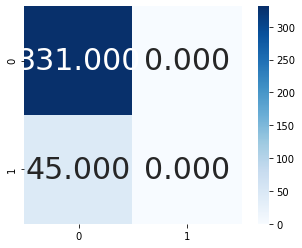

In [177]:
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')

In [181]:
best_scores

{'Alcohol_bin': array([[  0,  13],
        [  0, 363]]),
 'Amphet_bin': array([[241,   0],
        [135,   0]]),
 'Amyl_bin': array([[302,   0],
        [ 74,   0]]),
 'Benzos_bin': array([[223,   0],
        [153,   0]]),
 'Caff_bin': array([[  0,   7],
        [  0, 369]]),
 'Cannabis_bin': array([[  0, 124],
        [  0, 252]]),
 'Choc_bin': array([[  0,   7],
        [  0, 369]]),
 'Coke_bin': array([[240,   0],
        [136,   0]]),
 'Crack_bin': array([[338,   0],
        [ 38,   0]]),
 'Ecstasy_bin': array([[227,   0],
        [149,   0]]),
 'Heroin_bin': array([[334,   0],
        [ 42,   0]]),
 'Ketamine_bin': array([[307,   0],
        [ 69,   0]]),
 'Legalh_bin': array([[225,   0],
        [151,   0]]),
 'LSD_bin': array([[266,   0],
        [110,   0]]),
 'Meth_bin': array([[293,   0],
        [ 83,   0]]),
 'Shrooms_bin': array([[238,   0],
        [138,   0]]),
 'Nicotine_bin': array([[  0, 124],
        [  0, 252]]),
 'VSA_bin': array([[331,   0],
        [ 45,   0]])}

## Model tuning

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

# Making predictions on the training set using cross validation as well as calculating the probabilities
# cross_val_predict expects an estimator (model), X, y and nr of cv-splits (cv)
y_train_predicted = cross_val_predict(pipe_logreg, X_train, y_train, cv=5)


y_train_pred_xgb_party = cross_val_predict(xgb,X_train_party, y_train_party) 
print(classification_report(y_train_party, y_train_pred_xgb_party)) 
print(confusion_matrix(y_train_party, y_train_pred_xgb_party)) 

### Define Classifier and Parameters

In [20]:
#Define Classifier
clf_DT = DecisionTreeClassifier(random_state=1)
clf_DC = DummyClassifier(strategy="most_frequent", random_state=1)
clf_RF = RandomForestClassifier(random_state=1)

#Define Parameters
parameters_DT = {'max_depth':[1, 6],                
              #'learning_rate':[0.1, 0.5, 1.],               
              #'base_estimator__min_samples_split' : np.arange(2, 8, 2),               
              #'base_estimator__max_depth' : np.arange(1, 4, 1)              
             } 
parameters_DC = {'max_depth':[1, 6],                
              #'learning_rate':[0.1, 0.5, 1.],               
              #'base_estimator__min_samples_split' : np.arange(2, 8, 2),               
              #'base_estimator__max_depth' : np.arange(1, 4, 1)              
             } 


classifieres = [clf_A]

In [85]:
def train_predict(classifiers, parameters, drugs, X, y,cv=5):
    results = {}
    # Choose the clf and define paramters
    for clf in classifiers: 
  
        #Make the scorer
        scores = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
        
        # Perform GridSearch
        best_scores = {}
        best_param = {}
        #best_model = {}
        for d in drugs:
            #X_train, X_test, y_train, y_test = train_test_split(X, df[y], test_size=0.2, random_state=1, stratify=df[y])
            grid = GridSearchCV(estimator=clf, param_grid=parameters, cv=cv, scoring=scores, refit='roc_auc')
            grid_fit = grid.fit(X,y) 
            best_scores[d] = grid_fit.cv_results_
            best_param[d] = grid_fit.best_params_
            best_clf = grid_fit.best_estimator_ 
            
    return best_scores, best_param

            
            #best_scores[y]=np.mean(scores['test_recall']).round(2)
            
        
        #Fit the GridSearch 
       
        
        
        
        #Get the estimator 
        
        
        
        # Get the predictors
        #predictions = (clf.fit(X_train, y_train)).predict(X_test)
        #best_predictions = best_clf.predict(X_test) 
        #predictions_test = learner.predict(X_test)
        #predictions_train = learner.predict(X_train)
        #
        ## Get the results
        #print("Unoptimized model\n------")
        #print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
        #print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
        #print("\nOptimized Model\n------")
        #print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
        #print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
        #print(best_clf)
                
    
    

In [86]:
drugs = ['Alcohol']

In [87]:
best_scores, best_param = train_predict(classifieres, parameters_DT, drugs, X, y,cv=5)

ValueError: Target is multilabel-indicator but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted', 'samples'].

In [69]:
df1 = pd.DataFrame(best_scores['Alcohol'])
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.00410,0.000883,0.008393,0.002650,1,{'max_depth': 1},0.963989,0.962766,0.965333,0.965333,0.965333,0.964551,0.001033,2,0.961326,1.000000,1.000000,1.0,1.0,0.992265,0.015470,1,0.928191,0.962766,0.965333,0.965333,0.965333,0.957391,0.014634,1,0.962656,0.981030,0.982361,0.982361,0.982361,0.978154,0.007766,1,0.516377,0.500000,0.500000,0.500000,0.500000,0.503275,0.006551,2
1,0.00511,0.000235,0.005825,0.000605,6,{'max_depth': 6},0.966292,0.962264,0.964865,0.965333,0.965333,0.964818,0.001359,1,0.950276,0.986188,0.986188,1.0,1.0,0.984530,0.018207,2,0.920213,0.949468,0.952000,0.965333,0.965333,0.950470,0.016497,2,0.958217,0.974079,0.975410,0.982361,0.982361,0.974486,0.008829,2,0.548540,0.375493,0.736294,0.728326,0.588504,0.595431,0.132757,1
